Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


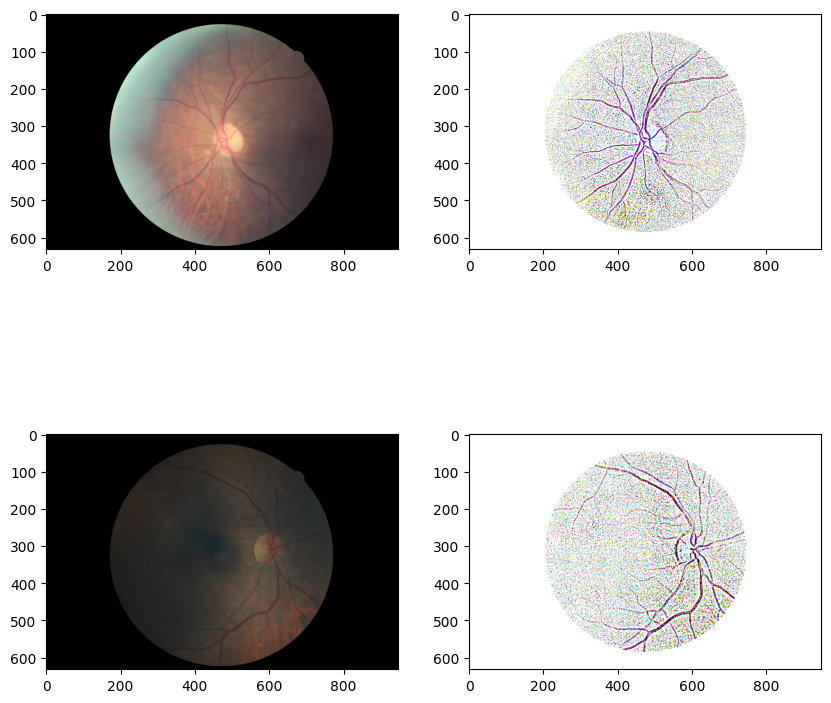

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

def plot_images(images):  
    plt.figure(figsize=(10, 10))
    columns = 2
    rows = int(np.ceil(len(images) / columns))
    for i, image in enumerate(images):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(image)

def scaleRadius(img, scale):
    x = img[img.shape[0] // 2, :, :].sum(1)
    r = (x > x.mean() / 10).sum() / 2
    s = scale * 1.0 / r
    return cv2.resize(img, (0, 0), fx=s, fy=s)

read_path_1 = join('assets', '10_left.jpeg')
read_path_2 = join('assets', '10_right.jpeg')
scale = 300

img_left = cv2.imread(read_path_1)
img_right = cv2.imread(read_path_2)
scaled_img_left = scaleRadius(img_left, scale)
scaled_img_right = scaleRadius(img_right, scale)

b = np.zeros(scaled_img_left.shape)
cv2.circle(b, (scaled_img_left.shape[1] // 2, scaled_img_left.shape[0] // 2), int(scale * 0.9), (1, 1, 1), -1, 8, 0)

img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)
scaled_img_left = cv2.cvtColor(scaled_img_left, cv2.COLOR_BGR2RGB)
img_left_blur = cv2.GaussianBlur(scaled_img_left, (0, 0), scale / 180)
img_left_blend = cv2.addWeighted(scaled_img_left, 4, img_left_blur, -4, 10) * b + 10 * (1 - b)
img_left_blend = cv2.cvtColor(np.float32(img_left_blend), cv2.COLOR_BGR2RGB)

img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)
scaled_img_right = cv2.cvtColor(scaled_img_right, cv2.COLOR_BGR2RGB)
img_right_blur = cv2.GaussianBlur(scaled_img_right, (0, 0), scale / 100)
img_right_blend = cv2.addWeighted(scaled_img_right, 4, img_right_blur, -4, 10) * b + 10 * (1 - b)
img_right_blend = cv2.cvtColor(np.float32(img_right_blend), cv2.COLOR_BGR2RGB)

plot_images([scaled_img_left, img_left_blend, scaled_img_right, img_right_blend])

This code reads an image from a file, scales the radius of the image, and applies a series of image processing operations to enhance the image. Specifically, it performs the following steps:

1. Imports necessary libraries including OpenCV, NumPy, and Matplotlib.
2. Defines a function `plot_images` that takes a list of images and plots them in a grid.
3. Defines a function `scaleRadius` that scales the radius of an image based on the sum of pixel values along the vertical axis.
4. Reads an image from a file using the `cv2.imread` function.
5. Scales the radius of the image using the `scaleRadius` function.
6. Creates a binary mask `b` that is the same size as the scaled image and has a circular region of ones in the center.
7. Converts the color space of the original and scaled images from BGR to RGB using the `cv2.cvtColor` function.
8. Applies a Gaussian blur to the scaled image using the `cv2.GaussianBlur` function.
9. Combines the scaled image and blurred image using the `cv2.addWeighted` function with alpha=4 and gamma=-4.
10. Multiplies the combined image by the binary mask `b` and adds 10*(1-b) to adjust the brightness of the image.
11. Converts the color space of the final image from BGR to RGB using the `cv2.cvtColor` function.
12. Plots the original image, scaled image, blurred image, and final image using the `plot_images` function.

`cv2.GaussianBlur`:
- `src`: input image
- `ksize`: Gaussian kernel size. This is a tuple specifying the width and height of the kernel. If both values are set to 0, the kernel size is calculated from the sigma values.
- `sigmaX`: Gaussian kernel standard deviation in the X direction.
- `sigmaY`: Gaussian kernel standard deviation in the Y direction. If set to 0, it is assumed to be equal to `sigmaX`.

In the code, the `cv2.GaussianBlur` function is used to blur the scaled image. The `ksize` parameter is set to `(0, 0)` to calculate the kernel size from the `sigma` value, which is set to `scale/180`. This means that the kernel size will be proportional to the scale of the image.

`cv2.addWeighted`:
- `src1`: first input array.
- `alpha`: weight of the first array elements.
- `src2`: second input array of the same size and channel number as `src1`.
- `beta`: weight of the second array elements.
- `gamma`: scalar added to each sum.

In the code, the `cv2.addWeighted` function is used to combine the scaled image and blurred image. The `alpha` parameter is set to 4, which means that the scaled image will be weighted more heavily than the blurred image. The `beta` parameter is set to -4, which means that the blurred image will be weighted negatively. The `gamma` parameter is set to 10, which is added to each sum to adjust the brightness of the image. Finally, the result is multiplied by the binary mask `b` and added to `10 * (1 - b)` to adjust the brightness of the image in the non-circular regions.

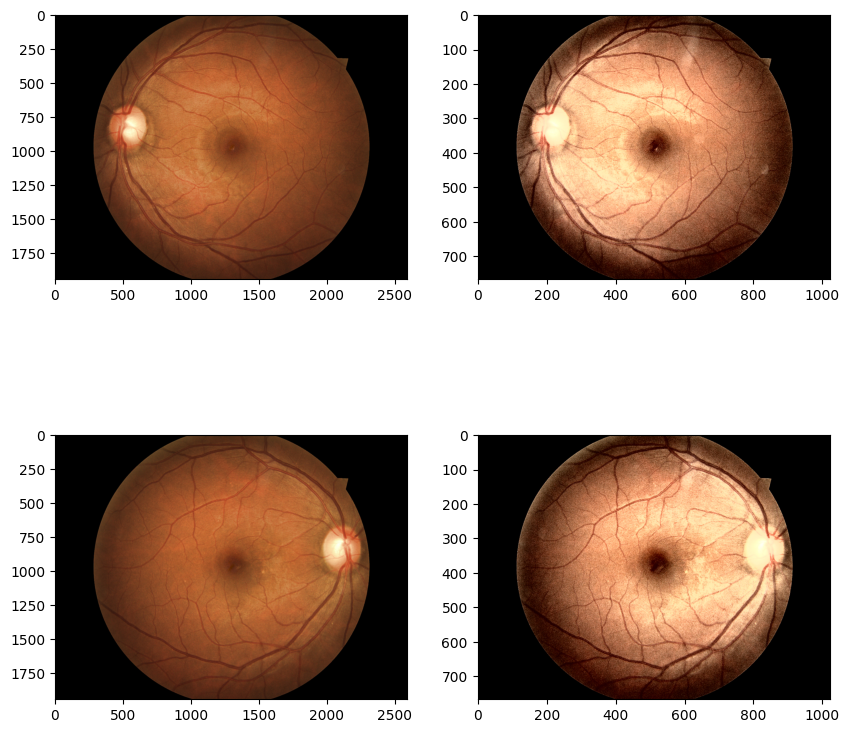

In [15]:
def histogram_equalization(im):
    """
    Apply histogram equalization to an image.
    """
    img_yuv = cv2.cvtColor(im, cv2.COLOR_BGR2YCrCb)
    img_yuv[:, :, 0] = cv2.equalizeHist(im[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YCR_CB2RGB)

read_path_3 = join('assets', '13_left.jpeg')
read_path_4 = join('assets', '13_right.jpeg')
scale = 400

img_left = cv2.imread(read_path_3)
img_right = cv2.imread(read_path_4)
original_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)
original_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)
scaled_left = scaleRadius(img_left, scale)
scaled_right = scaleRadius(img_right, scale)

b = np.zeros(scaled_left.shape)
cv2.circle(b, (scaled_left.shape[1] // 2, scaled_left.shape[0] // 2), int(scale * 0.9), (1, 1, 1), -1, 8, 0)

enhanced_left = histogram_equalization(scaled_left)
enhanced_right = histogram_equalization(scaled_right)

plot_images([original_left, enhanced_left, original_right, enhanced_right])

This code reads two images from files, applies a series of image processing operations to enhance the images, and then plots the enhanced images side by side. Specifically, it performs the following steps:

1. Imports necessary libraries including OpenCV, NumPy, and Matplotlib.
2. Defines a function `histogram_equalization` that applies histogram equalization to the input image.
3. Reads two images from files using the `cv2.imread` function.
4. Converts the color space of the images from BGR to RGB using the `cv2.cvtColor` function.
5. Scales the radius of the images using the `scaleRadius` function.
6. Creates binary masks `b` and `c` that are the same size as the scaled images and have a circular region of ones in the center.
7. Applies histogram equalization to the scaled images using the `histogram_equalization` function.
8. Plots the enhanced images side by side using the `plot_images` function.

In the code, the `histogram_equalization` function is used to enhance the images by applying histogram equalization to the Y channel of the YCrCb color space. This helps to improve the contrast and brightness of the images. The `scaleRadius` function is used to scale the radius of the images based on the sum of pixel values along the vertical axis. This helps to normalize the size of the optic disc in the images. Finally, the binary masks `b` and `c` are used to apply circular regions of ones to the images, which helps to focus the image processing operations on the central region of the images.

The `histogram_equalization` function is used to enhance the contrast and brightness of an input image by applying histogram equalization to the Y channel of the YCrCb color space. Here's a step-by-step explanation of what the function does:

1. Convert the input image from the BGR color space to the YCrCb color space using the `cv2.cvtColor` function.
2. Extract the Y channel from the YCrCb image using NumPy array slicing.
3. Apply histogram equalization to the Y channel using the `cv2.equalizeHist` function.
4. Replace the original Y channel with the equalized Y channel in the YCrCb image.
5. Convert the YCrCb image back to the RGB color space using the `cv2.cvtColor` function.
6. Return the enhanced RGB image.

By applying histogram equalization to the Y channel of the YCrCb color space, the function is able to enhance the contrast and brightness of the image while preserving the color information. This can be useful for improving the visibility of details in an image that might be difficult to see otherwise.

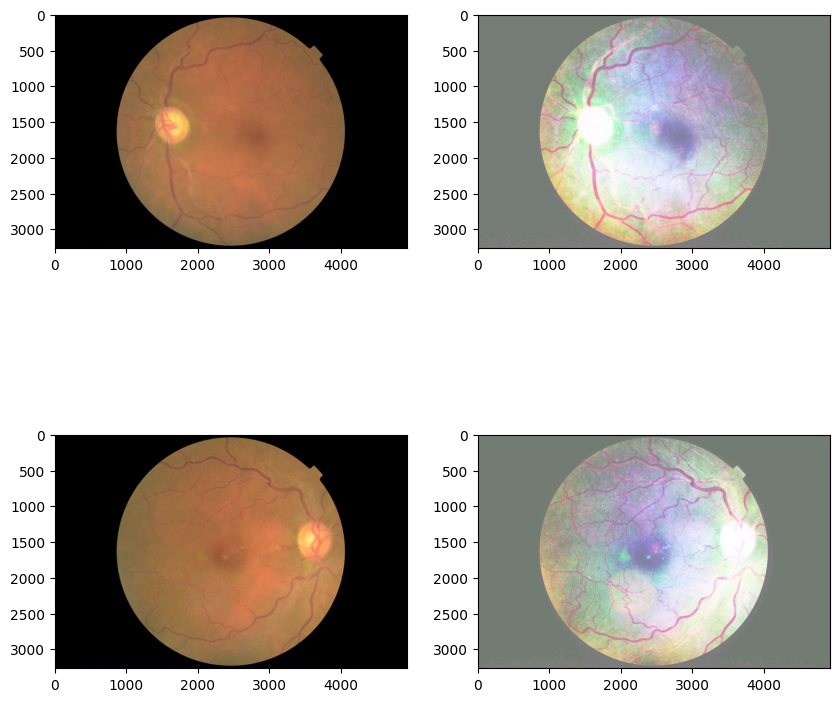

In [28]:
from skimage import exposure as ex

def histogram_equalization(img):
    output = np.zeros((img.shape[0], img.shape[1], 3))
    for channel in range(img.shape[2]):
        output[:, :, channel] = ex.equalize_hist(img[:, :, channel]) * 255

    output[output > 255] = 255
    output[output < 0] = 0
    return output.astype(np.uint8)

read_path_5 = join('assets', '15_left.jpeg')
read_path_6 = join('assets', '15_right.jpeg')

img_left = cv2.imread(read_path_5)
original_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)

img_right = cv2.imread(read_path_6)
original_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)

result1 = histogram_equalization(img_left)
result2 = histogram_equalization(img_right)

plot_images([original_left, result1, original_right, result2])

This code imports the `exposure` module from the `skimage` library and defines three functions: `he`, `thresh`, and `brightness`. 

The `he` function performs histogram equalization on an input image. If the input image is grayscale, it applies the `equalize_hist` function from the `exposure` module to the entire image. If the input image is RGB, it applies the `equalize_hist` function to each color channel separately. The output is then scaled to the range [0, 255] and returned as a numpy array of type `uint8`.

The `thresh` function reads an image file using OpenCV's `imread` function, applies a binary threshold using OpenCV's `threshold` function, and then resizes the output image to a fixed size of (750, 550) using OpenCV's `resize` function. Finally, it displays the thresholded image using OpenCV's `imshow` function.

The `brightness` function reads an image file using OpenCV's `imread` function, but it does not perform any further processing on the image.

The code then defines two file paths and a scale factor, reads in two images using OpenCV's `imread` function, converts them from BGR to RGB using OpenCV's `cvtColor` function, applies histogram equalization to each image using the `he` function, and then displays the original and equalized images side by side using a custom `plot_images` function.

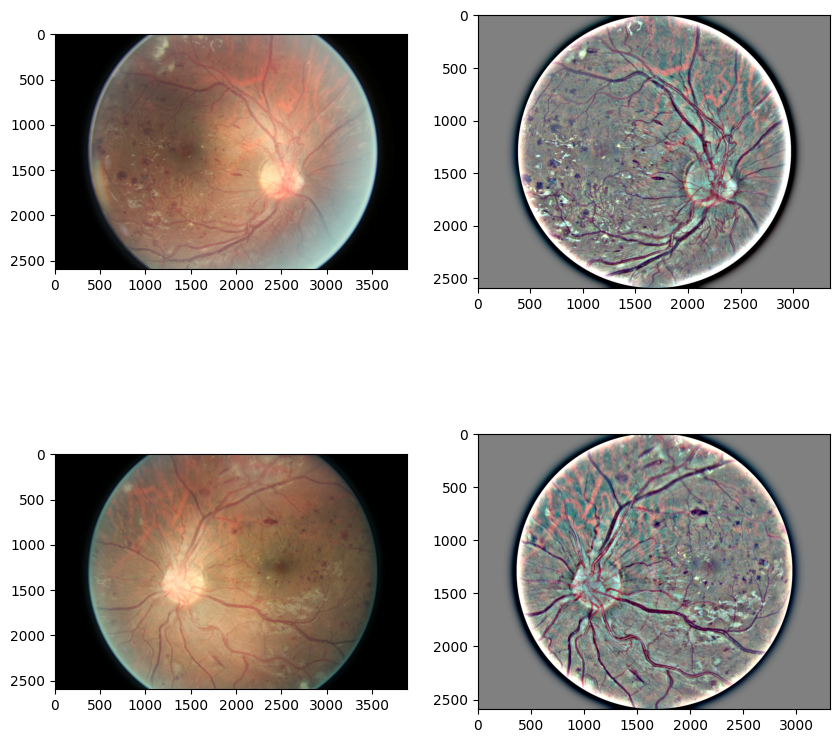

In [30]:
import cv2
import numpy as np

# Function to crop an image based on gray intensity
def crop_image_from_gray(img, tol=7):
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1), mask.any(0))]
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol

        check_shape = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))].shape[0]
        if check_shape == 0:
            return img  # Image is too dark, so return the original image
        else:
            img_channels = [img[:, :, i][np.ix_(mask.any(1), mask.any(0))] for i in range(3)]
            img = np.stack(img_channels, axis=-1)
        return img

# Function to perform circular cropping and enhance the image
def circle_crop(img, sigmaX=50):
    # Crop the image based on gray intensity
    img = crop_image_from_gray(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    height, width, depth = img.shape

    x = int(width / 2)
    y = int(height / 2)
    r = np.amin((x, y))

    # Create a circular mask
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x, y), int(r), 1, thickness=-1)

    # Apply the circular mask to the image
    img = cv2.bitwise_and(img, img, mask=circle_img)

    # Enhance the image using Gaussian blur
    img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), sigmaX), -4, 128)
    
    return img

# Example usage
read_path_7 = join('assets', '16_left.jpeg')
read_path_8 = join('assets', '16_right.jpeg')


img_left = cv2.imread(read_path_7)
img_left2 = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)

img_right = cv2.imread(read_path_8)
img_right2 = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)

img_left_enhanced = circle_crop(img_left)
img_right_enhanced = circle_crop(img_right)

plot_images([img_left2, img_left_enhanced, img_right2, img_right_enhanced])


This code defines two functions: `crop_image_from_gray` and `circle_crop`, and then applies them to two input images to create circular crops around the center of each image.

The `crop_image_from_gray` function takes an input image and a tolerance value as parameters. If the input image is grayscale, it creates a binary mask by thresholding the image with the given tolerance value. It then crops the image to the smallest bounding box that contains all non-zero pixels in the mask. If the input image is RGB, it first converts it to grayscale, creates the binary mask, and then crops each color channel separately using the same mask. Finally, it stacks the cropped color channels back together to form the output image.

The `circle_crop` function takes an input image and a Gaussian blur sigma value as parameters. It first applies the `crop_image_from_gray` function to the input image. It then creates a circular binary mask centered at the center of the image and with a radius equal to the minimum of the image width and height. It applies the mask to the input image using OpenCV's `bitwise_and` function, and then crops the resulting image using the `crop_image_from_gray` function again. Finally, it applies a Gaussian blur to the cropped image using OpenCV's `GaussianBlur` function, and then returns the blurred image.

The code then defines two file paths, reads in two images using OpenCV's `imread` function, converts them from BGR to RGB using OpenCV's `cvtColor` function, applies the `circle_crop` function to each image, and then displays the original and cropped images side by side using a custom `plot_images` function.

The `circle_crop` function takes an input image and a Gaussian blur sigma value as parameters. 

It first applies the `crop_image_from_gray` function to the input image. The `crop_image_from_gray` function crops the image to the smallest bounding box that contains all non-zero pixels in the image. This is useful for removing any black borders or other unwanted areas around the edges of the image. 

The `circle_crop` function then converts the cropped image from BGR to RGB using OpenCV's `cvtColor` function. 

It then calculates the center point of the image and the radius of the circle that will be used to crop the image. 

It creates a circular binary mask centered at the center of the image and with a radius equal to the minimum of the image width and height. 

It applies the mask to the input image using OpenCV's `bitwise_and` function, which sets all pixels outside the circle to zero. 

It then crops the resulting image using the `crop_image_from_gray` function again. 

Finally, it applies a Gaussian blur to the cropped image using OpenCV's `GaussianBlur` function, with a kernel size of (0,0) and a sigma value of `sigmaX`. It then returns the blurred image. The Gaussian blur helps to smooth out any noise or other artifacts in the image, which can improve the quality of the final result. 

The `sigmaX` parameter controls the amount of blurring applied to the image. A higher value of `sigmaX` will result in more blurring, while a lower value will result in less blurring.

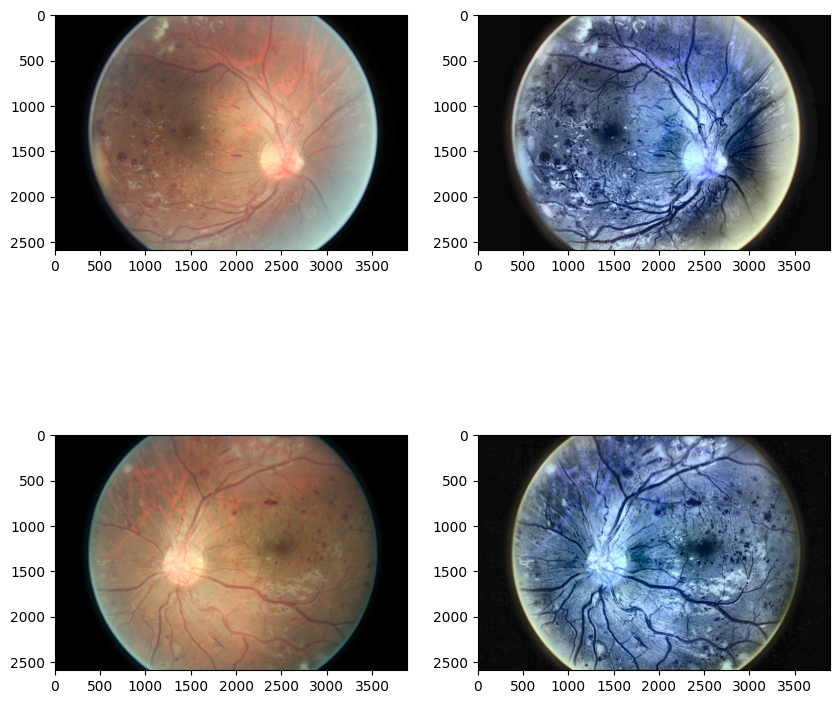

In [31]:
# Define a function for image enhancement
def image_enhancement_5(img):
    # Make a copy of the input image
    copy = img.copy()

    # Convert the copy to grayscale
    copy = cv2.cvtColor(copy, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian blur to the grayscale image
    blur = cv2.GaussianBlur(copy, (5, 5), 0)

    # Apply thresholding to create a binary image
    thresh = cv2.threshold(blur, 10, 255, cv2.THRESH_BINARY)[1]

    # Find contours in the binary image
    contour = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0]
    contour = contour[:, 0, :]

    # Determine the coordinates of the bounding box
    x1 = tuple(contour[contour[:, 0].argmin()])[0]
    y1 = tuple(contour[contour[:, 1].argmin()])[1]
    x2 = tuple(contour[contour[:, 0].argmax()])[0]
    y2 = tuple(contour[contour[:, 1].argmax()])[1]

    # Calculate cropping offsets based on the bounding box
    x_offset = int((x2 - x1) * 4 / 50)
    y_offset = int((y2 - y1) * 5 / 50)

    # Make a second copy of the input image
    copy2 = img.copy()

    # Crop and resize the image if the bounding box is sufficiently large
    if x2 - x1 > 100 and y2 - y1 > 100:
        copy2 = copy2[y1 + y_offset: y2 - y_offset, x1 + x_offset: x2 - x_offset]
        copy2 = cv2.resize(copy2, (400, 400))

    # Convert the cropped image to LAB color space
    lab = cv2.cvtColor(copy2, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to the L channel
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))

    # Convert back to RGB color space
    son = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

    # Apply median blur to the enhanced image
    med_son = cv2.medianBlur(son, 3)

    # Apply median blur to a background version of the enhanced image
    arka_plan = cv2.medianBlur(son, 37)

    # Create a mask to subtract the background
    maske = cv2.addWeighted(med_son, 1, arka_plan, -1, 255)

    # Apply the mask to the enhanced image
    son_img = cv2.bitwise_and(maske, med_son)

    return son_img

# Example usage:
# Load the input images
img_left = cv2.imread('assets/16_left.jpeg')
img_right = cv2.imread('assets/16_right.jpeg')

# Apply image enhancement to the input images
img_left_enhanced = image_enhancement_5(img_left)
img_right_enhanced = image_enhancement_5(img_right)

# Now, you can display the images using your 'plot_images' function if available.
plot_images([img_left2, img_left_enhanced, img_right2, img_right_enhanced])


This code defines a function `image_enhancement_5` that performs image enhancement on an input image. The function first makes a copy of the input image and converts it to grayscale. It then applies Gaussian blur and thresholding to create a binary image. The function finds the contours in the binary image and determines the coordinates of the bounding box. It then crops and resizes the image if the bounding box is sufficiently large. The function converts the cropped image to LAB color space and applies CLAHE to the L channel. It then converts the image back to RGB color space and applies median blur to the enhanced image. The function applies median blur to a background version of the enhanced image and creates a mask to subtract the background. Finally, the function applies the mask to the enhanced image and returns the result.

The code then loads two input images, applies the `image_enhancement_5` function to each image, and displays the original and enhanced images using a `plot_images` function (not shown in the code).

1. `cv2.GaussianBlur`: This function applies a Gaussian blur to an image to reduce noise and smooth out the image. It takes the input image, the kernel size, and the standard deviation of the Gaussian distribution as parameters.

2. `cv2.threshold`: This function applies thresholding to an image to create a binary image. It takes the input image, a threshold value, a maximum value, and a thresholding type as parameters.

3. `cv2.findContours`: This function finds contours in a binary image. It takes the input image, a contour retrieval mode, and a contour approximation method as parameters.

4. `cv2.createCLAHE`: This function creates a Contrast Limited Adaptive Histogram Equalization (CLAHE) object. It takes the clip limit and tile grid size as parameters.

5. `cv2.medianBlur`: This function applies median blur to an image to reduce noise and smooth out the image. It takes the input image and the kernel size as parameters.

6. `cv2.addWeighted`: This function applies a weighted sum of two images to create a new image. It takes the first input image, the weight of the first image, the second input image, the weight of the second image, and a scalar value as parameters.

7. `cv2.bitwise_and`: This function applies a bitwise AND operation to two images to create a new image. It takes the first input image, the second input image, and an optional mask as parameters.